In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
from matplotlib.lines import Line2D
import pickle
#import seaborn as sns
import sys, os



In [2]:
rcParams['font.family'] = 'sans'
rcParams['mathtext.default'] = 'regular'
rcParams['figure.figsize'] = (10, 8)
rcParams['figure.dpi'] = 120
rcParams['font.size'] = 24
rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 45
rcParams['axes.linewidth'] = 2
rcParams['legend.fontsize'] = 12
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 8
rcParams['xtick.major.size'] = 15.0
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size'] = 7.0
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 15.0
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size'] = 7.0
rcParams['ytick.minor.width'] = 1
rcParams['text.usetex'] = False
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rcParams["figure.facecolor"] = "w"
rcParams["figure.edgecolor"] = "w"

# First graph


In [3]:
nqubits = [4,6,8,10,12]
nlayers = [4, 8, 12]
models = [1, 2]
seeds = 10

epsilon_pqc = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_uniform = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_gauss = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_uniform_ = np.zeros((len(models), len(nlayers), len(nqubits), seeds, 10))
epsilon_gauss_ = np.zeros((len(models), len(nlayers), len(nqubits), seeds, 10))


In [4]:
for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        for iq, qubits in enumerate(nqubits):
            for seed in range(seeds):
                nameEps = f'data_IC/q{qubits}_l{layers}_model{model}_r{seed}.pkl'
                with open(nameEps, 'rb') as f:

                    data = pickle.load(f)
                    epsilon_pqc[im, il, iq, seed] = data['PQC']
                    epsilon_uniform[im, il, iq, seed] = data['uniform1']
                    epsilon_gauss[im, il, iq, seed] = data['gauss1']
                    epsilon_uniform_[im, il, iq, seed, :] = data['uniform']
                    epsilon_gauss_[im, il, iq, seed, :] = data['gauss']
                    

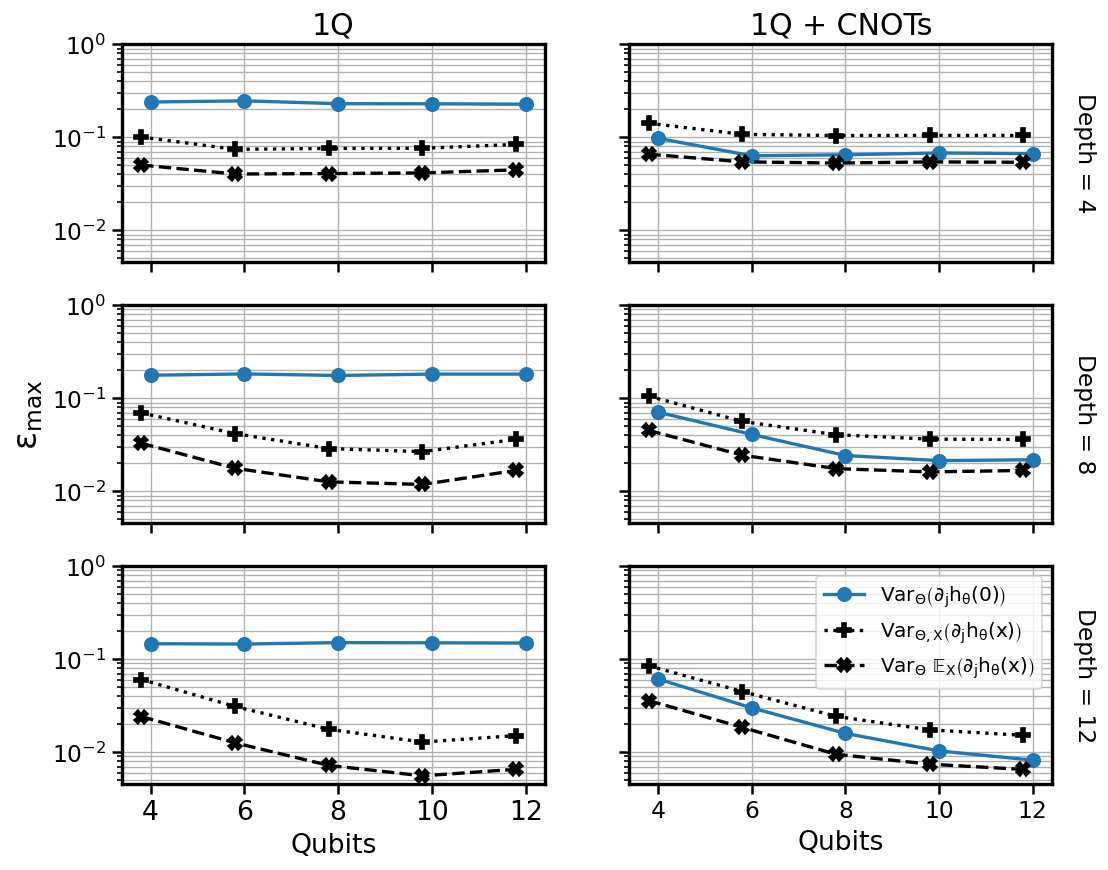

In [5]:

fig, ax = plt.subplots(nrows = len(nlayers), ncols = len(models), sharex=True, sharey=True)


for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        ax[il, im].plot(nqubits, np.mean(epsilon_pqc[im, il], axis = 1),
                       color = 'C0', marker = 'o')
        ax[il, im].plot(np.array(nqubits) - .2, np.mean(epsilon_gauss_[im, il], axis = (1, 2)), 
                       color = 'k', ls = ':', marker = 'P')
        ax[il, im].plot(np.array(nqubits) - .2, np.mean(epsilon_gauss[im, il], axis = 1), 
                       color = 'k', ls = '--', marker = 'X')
        

ticks = np.logspace(-2, 0, 3)  
for il in range(len(nlayers)):
    for im in range(len(models)):
        ax[il, im].tick_params(length=6, labelsize=14)
        ax[il, im].tick_params(which = 'minor', length=3)
        ax[il, im].grid(which='both')

ticks = np.logspace(-2, 0, 3)

for il in range(len(nlayers)):
    ax[il, 0].set_yscale('log')
    ax[il,0].set_xticks(nqubits)
    ax[il,0].set_xticklabels(nqubits, fontsize=16)
    
    ax[il,0].set_yticks(ticks)
    ax[il,-1].annotate('Depth = %s'%nlayers[il], (1.05, 0.5), xycoords = 'axes fraction', rotation = 270, va = 'center', fontsize = 14)

ax[1,0].set_ylabel(r'$\epsilon_{\rm max}$', fontsize = 20)

for im in range(len(models)):
    ax[-1,im].set_xlabel('Qubits', fontsize = 16)




ax[0,0].set_title('1Q',fontsize = 18)
ax[0,1].set_title('1Q + CNOTs', fontsize = 18)


legend = [Line2D([0], [0], color='C0', lw=2, ls = '-', marker = 'o'), 
              Line2D([0], [0], color='k', lw=2, ls = ':', marker='P'), 
              Line2D([0], [0], color='k', lw=2, ls = '--', marker='X')]


ax[2,1].legend(legend, [r'${\rm Var}_{\Theta} \left( \partial_j h_{\theta}(0)\right)$',
                        r'${\rm Var}_{\Theta, X} \left( \partial_j h_{\theta}(x)\right)$', 
                       r'${\rm Var}_{\Theta} \ \mathbb{E}_{X} \left( \partial_j h_{\theta}(x)\right)$'])

fig.savefig('layered_ansatzes_gauss.pdf')


# Second graph


In [9]:
nqubits = [4,6,8,10,12]
nlayers = [4,20,40]
models = [3, 4, 5]
seeds = 10

epsilon_pqc = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_uniform = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_gauss = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_uniform_ = np.zeros((len(models), len(nlayers), len(nqubits), seeds, 10))
epsilon_gauss_ = np.zeros((len(models), len(nlayers), len(nqubits), seeds, 10))


In [10]:
for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        for iq, qubits in enumerate(nqubits):
            for seed in range(seeds):
                nameEps = f'data_IC/q{qubits}_l{layers}_model{model}_r{seed}.pkl'
                with open(nameEps, 'rb') as f:
                    data = pickle.load(f)
                    epsilon_pqc[im, il, iq, seed] = data['PQC']
                    epsilon_uniform[im, il, iq, seed] = data['uniform1']
                    epsilon_gauss[im, il, iq, seed] = data['gauss1']
                    epsilon_uniform_[im, il, iq, seed, :] = data['uniform']
                    epsilon_gauss_[im, il, iq, seed, :] = data['gauss']

In [ ]:
fig, ax = plt.subplots(nrows = len(nlayers), ncols = len(models), sharex=True, sharey=True, figsize = (10, 8))

for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        ax[il, im].plot(nqubits, np.mean(epsilon_pqc[im, il], axis = 1),
                       color = 'C0', marker = 'o')
        ax[il, im].plot(np.array(nqubits) - .2, np.mean(epsilon_gauss_[im, il], axis = (1, 2)), 
                       color = 'k', ls = ':', marker = 'P')
        ax[il, im].plot(np.array(nqubits) - .2, np.mean(epsilon_gauss[im, il], axis = 1), 
                       color = 'k', ls = '--', marker = 'X')

for il in range(len(nlayers)):
    for im in range(len(models)):
        ax[il, im].tick_params(length=6, labelsize=14)
        ax[il, im].tick_params(which = 'minor', length=3)
        ax[il, im].grid(which='both')

ticks = np.logspace(-2, 0, 3)

for il in range(len(nlayers)):
    ax[il, 0].set_yscale('log')
    ax[il,0].set_xticks(nqubits)
    ax[il,0].set_xticklabels(nqubits, fontsize=16)
    ax[il,0].set_ylabel(r'$\epsilon_{\rm max}$', fontsize = 20)
    ax[il,0].set_yticks(ticks)
    ax[il,-1].annotate('Depth = %s'%nlayers[il], (1.05, 0.5), xycoords = 'axes fraction', rotation = 270, va = 'center', fontsize = 14)

for im in range(len(models)):
    ax[-1,im].set_xlabel('Qubits', fontsize = 16)




ax[0,0].set_title('V = X, g = ZZ',fontsize = 15)
ax[0,1].set_title('V = (X, ZZ), g = ZZ', fontsize = 15)
ax[0,2].set_title('V = (X, ZZ), g = Y', fontsize = 15)


legend = [Line2D([0], [0], color='C0', lw=2, ls = '-', marker = 'o'), 
              Line2D([0], [0], color='k', lw=2, ls = ':', marker='P'), 
              Line2D([0], [0], color='k', lw=2, ls = '--', marker='X')]


ax[0,0].legend(legend, [r'${\rm Var}_{\Theta} \left( \partial_j h_{\theta}(0)\right)$',
                        r'${\rm Var}_{\Theta, X} \left( \partial_j h_{\theta}(x)\right)$', 
                       r'${\rm Var}_{\Theta} \ \mathbb{E}_{X} \left( \partial_j h_{\theta}(x)\right)$'])

fig.savefig('transl_invariant_ansatzes_gauss.pdf')


In [10]:
nqubits = [4,6,8,10,12]
nlayers = [4,40]
models = [3, 4, 5]
seeds = 10

epsilon_pqc = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_gauss = np.zeros((len(models), len(nlayers), len(nqubits), seeds))
epsilon_uniform = np.zeros((len(models), len(nlayers), len(nqubits), seeds))


In [11]:
for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        for iq, qubits in enumerate(nqubits):
            for seed in range(seeds):
                nameEps = f'data_IC/q{qubits}_l{layers}_model{model}_r{seed}.pkl'
                with open(nameEps, 'rb') as f:
                    data = pickle.load(f)
                    
                    epsilon_pqc[im, il, iq, seed] = data['PQC']
                    epsilon_gauss[im, il, iq, seed] = data['gauss']
                    epsilon_uniform[im, il, iq, seed] = data['uniform']

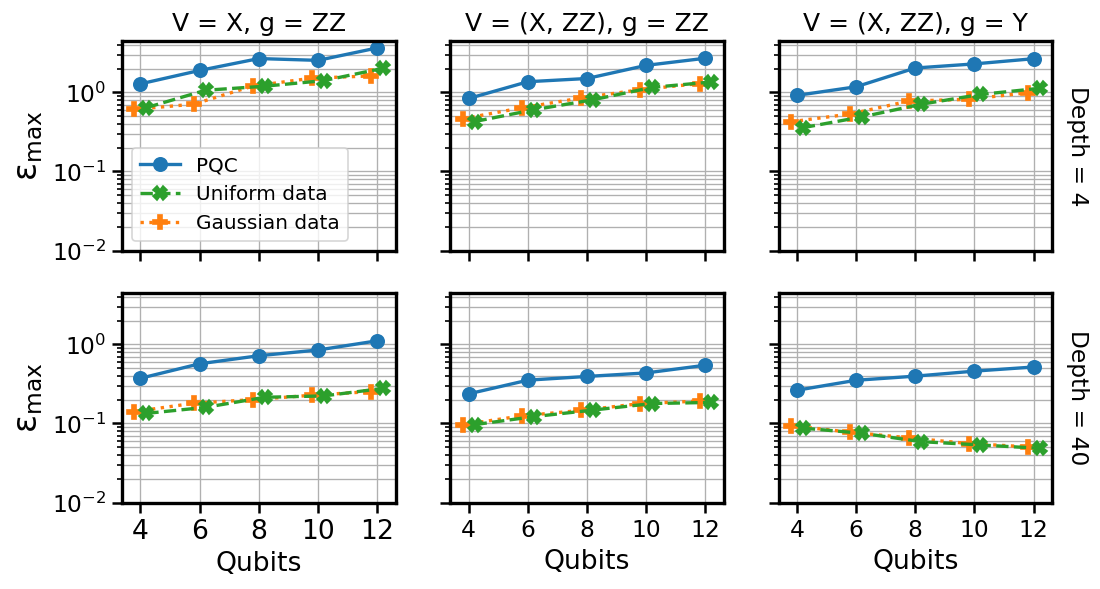

In [18]:
fig, ax = plt.subplots(nrows = len(nlayers), ncols = len(models), sharex=True, sharey=True, figsize = (10, 5))

for im, model in enumerate(models):
    for il, layers in enumerate(nlayers):
        ax[il, im].plot(nqubits, np.mean(epsilon_pqc[im, il], axis = 1),
                       color = 'C0', marker = 'o')
        ax[il, im].plot(np.array(nqubits) - .2, np.mean(epsilon_gauss[im, il], axis = 1), 
                       color = 'C1', ls = ':', marker = 'P')
        ax[il, im].plot(np.array(nqubits) + .2, np.mean(epsilon_uniform[im, il], axis = 1), 
                       color = 'C2', ls = '--', marker = 'X')

for il in range(len(nlayers)):
    for im in range(len(models)):
        ax[il, im].tick_params(length=6, labelsize=14)
        ax[il, im].tick_params(which = 'minor', length=3)
        ax[il, im].grid(which='both')

ticks = np.logspace(-2, 0, 3)

for il in range(len(nlayers)):
    ax[il, 0].set_yscale('log')
    ax[il,0].set_xticks(nqubits)
    ax[il,0].set_xticklabels(nqubits, fontsize=16)
    ax[il,0].set_ylabel(r'$\epsilon_{\rm max}$', fontsize = 20)
    ax[il,0].set_yticks(ticks)
    ax[il,-1].annotate('Depth = %s'%nlayers[il], (1.05, 0.5), xycoords = 'axes fraction', rotation = 270, va = 'center', fontsize = 14)

for im in range(len(models)):
    ax[-1,im].set_xlabel('Qubits', fontsize = 16)




ax[0,0].set_title('V = X, g = ZZ',fontsize = 15)
ax[0,1].set_title('V = (X, ZZ), g = ZZ', fontsize = 15)
ax[0,2].set_title('V = (X, ZZ), g = Y', fontsize = 15)

legend = [Line2D([0], [0], color='C0', lw=2, ls = '-', marker = 'o'), 
          Line2D([0], [0], color='C2', lw=2, ls = '--', marker='X'), 
          Line2D([0], [0], color='C1', lw=2, ls = ':', marker='P')]
                
ax[0,0].legend(legend, ['PQC', 'Uniform data', 'Gaussian data'])

fig.savefig('transl_invariant_ansatzes.pdf')
